In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

# ---
# Mouse
### Quake_10x_Limb_Muscle

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P7_14_AAACCTGCAGGTCCAC,endothelial cell,CL:0000115,endothelial cell,11.0,Quake_10x_Limb_Muscle,3-F-56,endothelial cell,F,Limb Muscle,Mus musculus,10X_P7_14,10x,
10X_P7_14_AAACCTGCATCAGTAC,endothelial cell,CL:0000115,endothelial cell,1.0,Quake_10x_Limb_Muscle,3-F-56,endothelial cell,F,Limb Muscle,Mus musculus,10X_P7_14,10x,
10X_P7_14_AAACCTGGTTATCACG,T cell,CL:0000084,T cell,6.0,Quake_10x_Limb_Muscle,3-F-56,T cell,F,Limb Muscle,Mus musculus,10X_P7_14,10x,
10X_P7_14_AAACCTGTCCCAGGTG,B cell,CL:0000236,B cell,2.0,Quake_10x_Limb_Muscle,3-F-56,B cell,F,Limb Muscle,Mus musculus,10X_P7_14,10x,
10X_P7_14_AAACGGGAGAGTGACC,mesenchymal stem cell,CL:0000134,mesenchymal stem cell,0.0,Quake_10x_Limb_Muscle,3-F-56,mesenchymal stem cell,F,Limb Muscle,Mus musculus,10X_P7_14,10x,


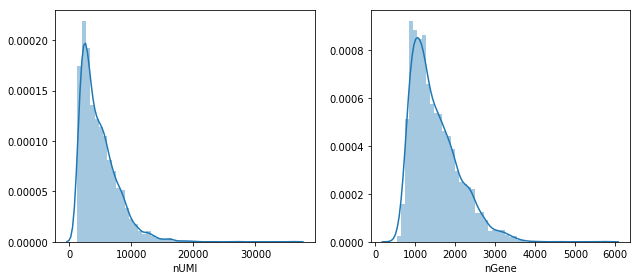

In [2]:
quake_10x_limb_muscle = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Limb_Muscle/data.h5")
utils.peek(quake_10x_limb_muscle, "Quake_10x_Limb_Muscle")
quake_10x_limb_muscle = quake_10x_limb_muscle.normalize()
quake_10x_limb_muscle.obs.head()

In [3]:
quake_10x_limb_muscle_model = cb.directi.fit_DIRECTi(
    quake_10x_limb_muscle, quake_10x_limb_muscle.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Quake_10x_Limb_Muscle/model_0"
)
quake_10x_limb_muscle.latent = quake_10x_limb_muscle_model.inference(quake_10x_limb_muscle)

[DIRECTi epoch 0] train=2.294, val=2.331, time elapsed=1.5s Best save...
[DIRECTi epoch 1] train=2.292, val=2.326, time elapsed=0.4s Best save...
[DIRECTi epoch 2] train=2.284, val=2.314, time elapsed=0.4s Best save...
[DIRECTi epoch 3] train=2.266, val=2.291, time elapsed=0.4s Best save...
[DIRECTi epoch 4] train=2.236, val=2.245, time elapsed=0.4s Best save...
[DIRECTi epoch 5] train=1.871, val=1.128, time elapsed=0.4s Best save...
[DIRECTi epoch 6] train=0.919, val=0.888, time elapsed=0.4s Best save...
[DIRECTi epoch 7] train=0.845, val=0.873, time elapsed=0.4s Best save...
[DIRECTi epoch 8] train=0.842, val=0.884, time elapsed=0.4s
[DIRECTi epoch 9] train=0.842, val=0.866, time elapsed=0.4s Best save...
[DIRECTi epoch 10] train=0.840, val=0.865, time elapsed=0.4s Best save...
[DIRECTi epoch 11] train=0.840, val=0.864, time elapsed=0.4s Best save...
[DIRECTi epoch 12] train=0.839, val=0.865, time elapsed=0.4s
[DIRECTi epoch 13] train=0.836, val=0.851, time elapsed=0.3s Best save...


[  Info   ] Computing tSNE...


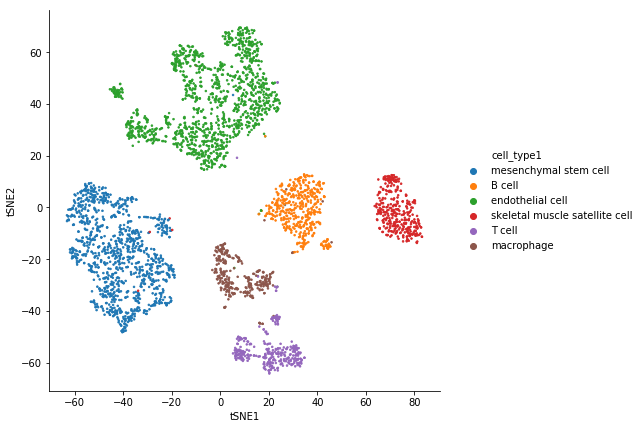

In [4]:
plot = quake_10x_limb_muscle.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Limb_Muscle/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


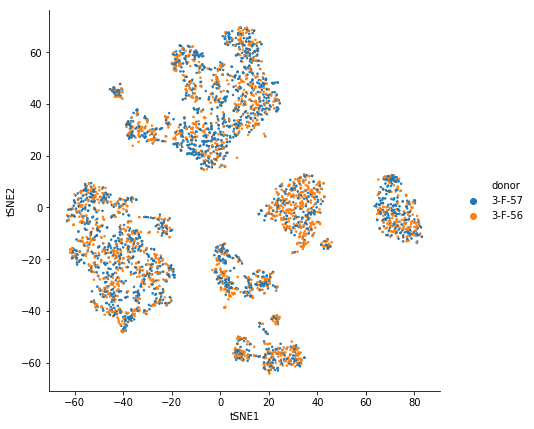

In [5]:
plot = quake_10x_limb_muscle.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Limb_Muscle/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


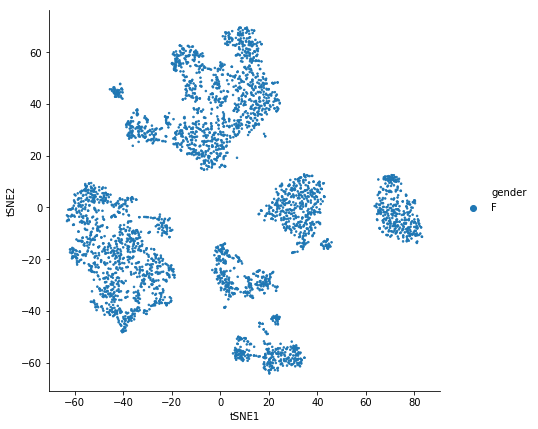

In [6]:
plot = quake_10x_limb_muscle.visualize_latent("gender")
plot.get_figure().savefig("Quake_10x_Limb_Muscle/gender.pdf", bbox_inches="tight")

In [7]:
%%capture capio
quake_10x_limb_muscle_models = [quake_10x_limb_muscle_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_limb_muscle_models.append(cb.directi.fit_DIRECTi(
        quake_10x_limb_muscle, quake_10x_limb_muscle.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Quake_10x_Limb_Muscle/model_%d" % i
    ))
quake_10x_limb_muscle_blast = cb.blast.BLAST(quake_10x_limb_muscle_models, quake_10x_limb_muscle, 
                                               keep_exprs=True).build_empirical()
quake_10x_limb_muscle_blast.save("Quake_10x_Limb_Muscle")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Limb_Muscle/model_1/checkpoint-185
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Limb_Muscle/model_2/checkpoint-148
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Limb_Muscle/model_3/checkpoint-147


In [8]:
with open("Quake_10x_Limb_Muscle/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Limb_Muscle/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [9]:
utils.self_projection(quake_10x_limb_muscle_blast, "Quake_10x_Limb_Muscle")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9941
Accuracy = 0.9969


### Quake_Smart-seq2_Limb_Muscle

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,organism,platform,region
L4.D042103.3_11_M.1,mesenchymal stem cell,CL:0000134,mesenchymal stem cell,D042103,1.0,Quake_Smart-seq2_Limb_Muscle,3_11_M,mesenchymal stem cell,M,Limb Muscle,Mus musculus,Smart-seq2,ForelimbandHindlimb
D1.D042103.3_11_M.1,skeletal muscle satellite cell,CL:0000594,skeletal muscle satellite cell,D042103,0.0,Quake_Smart-seq2_Limb_Muscle,3_11_M,skeletal muscle satellite cell,M,Limb Muscle,Mus musculus,Smart-seq2,ForelimbandHindlimb
N2.D042103.3_11_M.1,endothelial cell,CL:0000115,endothelial cell,D042103,3.0,Quake_Smart-seq2_Limb_Muscle,3_11_M,endothelial cell,M,Limb Muscle,Mus musculus,Smart-seq2,ForelimbandHindlimb
H4.D042103.3_11_M.1,skeletal muscle satellite cell,CL:0000594,skeletal muscle satellite cell,D042103,2.0,Quake_Smart-seq2_Limb_Muscle,3_11_M,skeletal muscle satellite cell,M,Limb Muscle,Mus musculus,Smart-seq2,ForelimbandHindlimb
E1.D042103.3_11_M.1,skeletal muscle satellite cell,CL:0000594,skeletal muscle satellite cell,D042103,0.0,Quake_Smart-seq2_Limb_Muscle,3_11_M,skeletal muscle satellite cell,M,Limb Muscle,Mus musculus,Smart-seq2,ForelimbandHindlimb


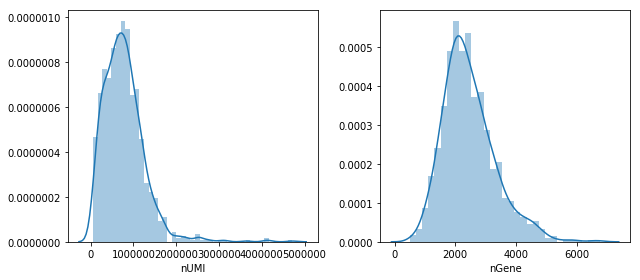

In [10]:
quake_smart_seq2_limb_muscle = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Limb_Muscle/data.h5")
utils.peek(quake_smart_seq2_limb_muscle, "Quake_Smart-seq2_Limb_Muscle")
quake_smart_seq2_limb_muscle = quake_smart_seq2_limb_muscle.normalize()
quake_smart_seq2_limb_muscle.obs.head()

In [11]:
quake_smart_seq2_limb_muscle_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_limb_muscle, quake_smart_seq2_limb_muscle.uns["seurat_genes"],
    **fixed_model_kwargs, 
    path="/tmp/cb/db/Quake_Smart-seq2_Limb_Muscle/model_0"
)
quake_smart_seq2_limb_muscle.latent = quake_smart_seq2_limb_muscle_model.inference(quake_smart_seq2_limb_muscle)

[DIRECTi epoch 0] train=2.623, val=2.887, time elapsed=1.1s Best save...
[DIRECTi epoch 1] train=2.622, val=2.884, time elapsed=0.1s Best save...
[DIRECTi epoch 2] train=2.616, val=2.880, time elapsed=0.1s Best save...
[DIRECTi epoch 3] train=2.614, val=2.876, time elapsed=0.1s Best save...
[DIRECTi epoch 4] train=2.612, val=2.872, time elapsed=0.1s Best save...
[DIRECTi epoch 5] train=2.608, val=2.867, time elapsed=0.1s Best save...
[DIRECTi epoch 6] train=2.602, val=2.862, time elapsed=0.1s Best save...
[DIRECTi epoch 7] train=2.595, val=2.857, time elapsed=0.1s Best save...
[DIRECTi epoch 8] train=2.592, val=2.851, time elapsed=0.1s Best save...
[DIRECTi epoch 9] train=2.581, val=2.845, time elapsed=0.1s Best save...
[DIRECTi epoch 10] train=2.579, val=2.838, time elapsed=0.1s Best save...
[DIRECTi epoch 11] train=2.572, val=2.830, time elapsed=0.1s Best save...
[DIRECTi epoch 12] train=2.565, val=2.821, time elapsed=0.1s Best save...
[DIRECTi epoch 13] train=2.555, val=2.808, time 

[  Info   ] Computing tSNE...


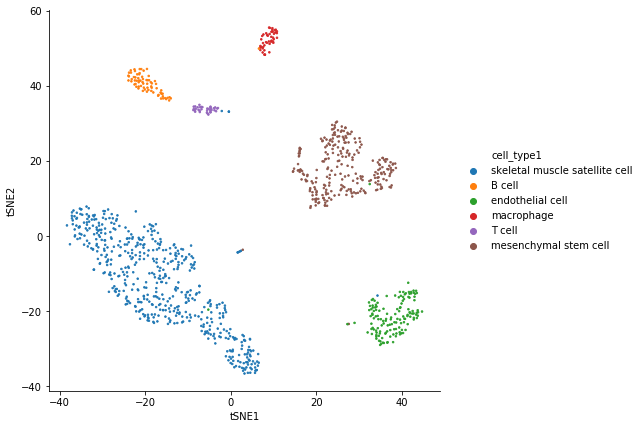

In [12]:
plot = quake_smart_seq2_limb_muscle.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Limb_Muscle/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


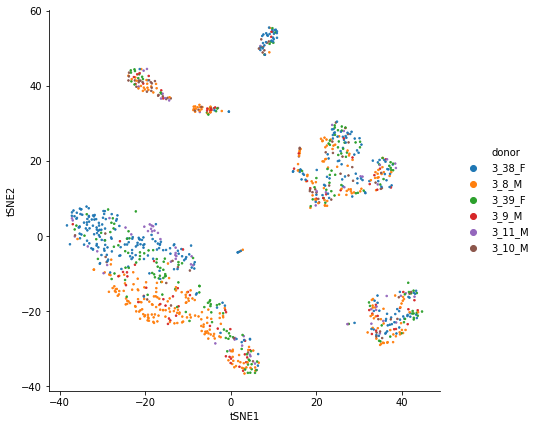

In [13]:
plot = quake_smart_seq2_limb_muscle.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Limb_Muscle/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


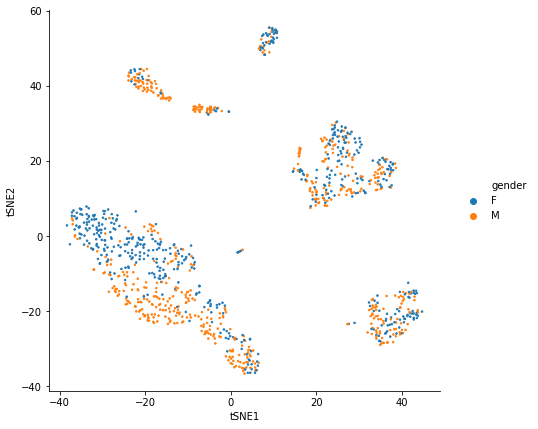

In [14]:
plot = quake_smart_seq2_limb_muscle.visualize_latent("gender")
plot.get_figure().savefig("Quake_Smart-seq2_Limb_Muscle/gender.pdf", bbox_inches="tight")

In [15]:
%%capture capio
quake_smart_seq2_limb_muscle_models = [quake_smart_seq2_limb_muscle_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_limb_muscle_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_limb_muscle, quake_smart_seq2_limb_muscle.uns["seurat_genes"],
        **fixed_model_kwargs, 
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Limb_Muscle/model_%d" % i
    ))
quake_smart_seq2_limb_muscle_blast = cb.blast.BLAST(quake_smart_seq2_limb_muscle_models, quake_smart_seq2_limb_muscle, 
                                               keep_exprs=True).build_empirical()
quake_smart_seq2_limb_muscle_blast.save("Quake_Smart-seq2_Limb_Muscle")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Limb_Muscle/model_1/checkpoint-358
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Limb_Muscle/model_2/checkpoint-315
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Limb_Muscle/model_3/checkpoint-292


In [16]:
with open("Quake_Smart-seq2_Limb_Muscle/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Limb_Muscle/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [17]:
utils.self_projection(quake_smart_seq2_limb_muscle_blast, "Quake_Smart-seq2_Limb_Muscle")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8881
Accuracy = 0.9990


## Mouse aligned

In [18]:
if not os.path.exists("ALIGNED_Mus_musculus_Limb_Muscle"):
    os.makedirs("ALIGNED_Mus_musculus_Limb_Muscle")
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_limb_muscle=quake_10x_limb_muscle,
    quake_smart_seq2_limb_muscle=quake_smart_seq2_limb_muscle
), merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [19]:
mouse.obs.head()

,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,latent_1,...,latent_7,latent_8,latent_9,organ,organism,plate,platform,region,tSNE1,tSNE2
10X_P7_14_AAACCTGCAGGTCCAC,endothelial cell,CL:0000115,endothelial cell,NaN,11.0,Quake_10x_Limb_Muscle,3-F-56,endothelial cell,F,-1.257816,...,-0.691145,2.018523,1.795394,Limb Muscle,Mus musculus,10X_P7_14,10x,,-32.640022,30.349506
10X_P7_14_AAACCTGCATCAGTAC,endothelial cell,CL:0000115,endothelial cell,NaN,1.0,Quake_10x_Limb_Muscle,3-F-56,endothelial cell,F,-0.487475,...,0.938416,0.171454,0.932896,Limb Muscle,Mus musculus,10X_P7_14,10x,,9.437260,43.528065
10X_P7_14_AAACCTGGTTATCACG,T cell,CL:0000084,T cell,NaN,6.0,Quake_10x_Limb_Muscle,3-F-56,T cell,F,2.332778,...,1.110975,-0.526474,-1.614823,Limb Muscle,Mus musculus,10X_P7_14,10x,,20.024622,-63.053173
10X_P7_14_AAACCTGTCCCAGGTG,B cell,CL:0000236,B cell,NaN,2.0,Quake_10x_Limb_Muscle,3-F-56,B cell,F,0.688809,...,0.699290,-2.233886,-1.187645,Limb Muscle,Mus musculus,10X_P7_14,10x,,34.970840,-14.310694
10X_P7_14_AAACGGGAGAGTGACC,mesenchymal stem cell,CL:0000134,mesenchymal stem cell,NaN,0.0,Quake_10x_Limb_Muscle,3-F-56,mesenchymal stem cell,F,1.177216,...,-1.907627,-0.808036,-1.812635,Limb Muscle,Mus musculus,10X_P7_14,10x,,-53.428257,-36.477180


In [20]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name"],
    #rmbatch_module=["MNNAdversarial", "Adversarial", "Adversarial", "Adversarial"],
    rmbatch_module_kwargs=dict(lambda_reg=0.01)
)  # Many batch effects are being aligned, decrease regularization strength accordingly
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Mus_musculus_Limb_Muscle/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.260, val=2.273, time elapsed=1.7s Regular save...
[DIRECTi epoch 1] train=2.254, val=2.263, time elapsed=0.6s
[DIRECTi epoch 2] train=2.239, val=2.238, time elapsed=0.7s
[DIRECTi epoch 3] train=2.189, val=2.137, time elapsed=0.6s
[DIRECTi epoch 4] train=1.368, val=0.983, time elapsed=0.6s
[DIRECTi epoch 5] train=0.829, val=0.882, time elapsed=0.6s
[DIRECTi epoch 6] train=0.822, val=0.864, time elapsed=0.6s
[DIRECTi epoch 7] train=0.820, val=0.852, time elapsed=0.6s
[DIRECTi epoch 8] train=0.818, val=0.836, time elapsed=0.6s
[DIRECTi epoch 9] train=0.815, val=0.836, time elapsed=0.6s
[DIRECTi epoch 10] train=0.804, val=0.800, time elapsed=0.6s Regular save...
[DIRECTi epoch 11] train=0.780, val=0.786, time elapsed=0.6s
[DIRECTi epoch 12] train=0.769, val=0.781, time elapsed=0.7s
[DIRECTi epoch 13] train=0.755, val=0.766, time elapsed=0.6s
[DIRECTi epoch 14] train=0.741, val=0.751, time elapsed=0.6s
[DIRECTi epoch 15] train=0.732, val=0.748, time elapsed=0.6s
[D

[  Info   ] Computing tSNE...


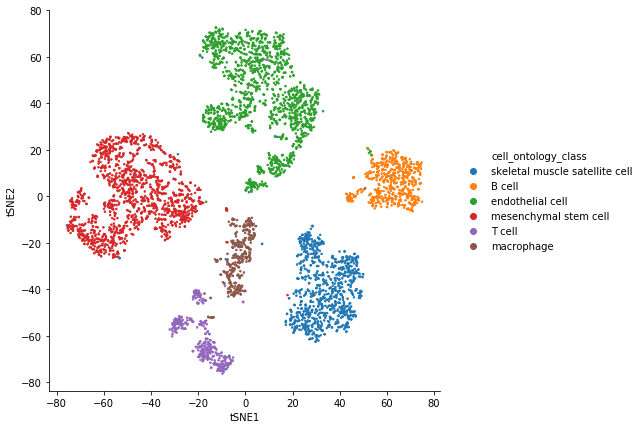

In [21]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Limb_Muscle/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


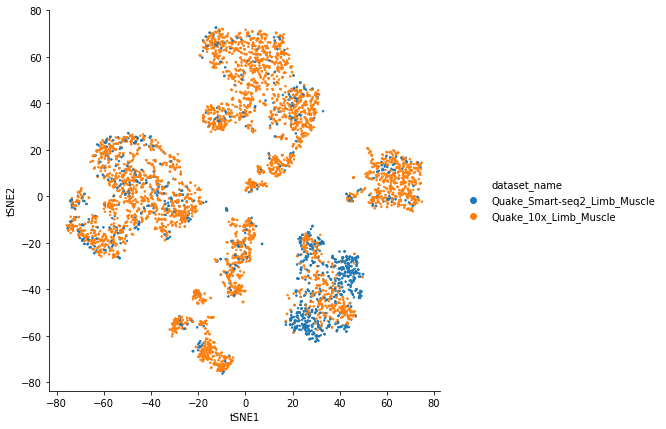

In [22]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Limb_Muscle/dataset_name.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


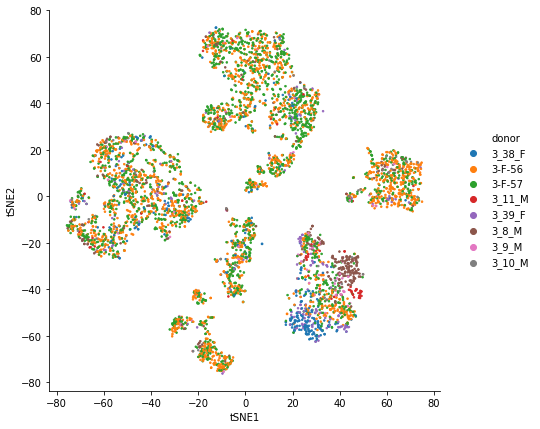

In [23]:
plot = mouse.visualize_latent("donor")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Limb_Muscle/donor.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


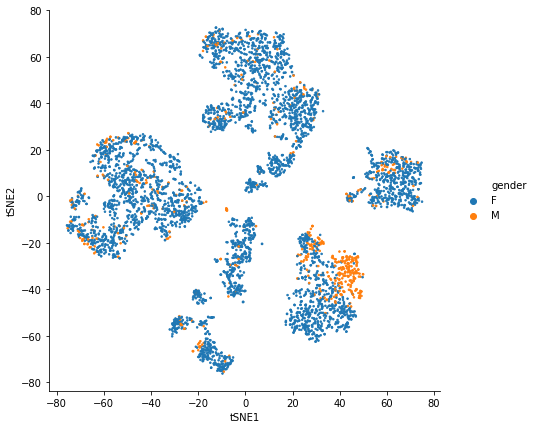

In [24]:
plot = mouse.visualize_latent("gender")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Limb_Muscle/gender.pdf", bbox_inches="tight")

In [25]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Limb_Muscle/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Limb_Muscle")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Limb_Muscle/model_1/checkpoint-108
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Limb_Muscle/model_2/checkpoint-143
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Limb_Muscle/model_3/checkpoint-164


In [26]:
with open("ALIGNED_Mus_musculus_Limb_Muscle/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Limb_Muscle/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Limb_Muscle")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9910
Accuracy = 0.9976
